## Dominant Color Extraction 

In [21]:
import matplotlib.pyplot as plt
import numpy as np 

In [22]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [23]:
import cv2

In [24]:
im =  cv2.imread('DigiKarobar-black.jpeg') #Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)


(732, 647, 3)


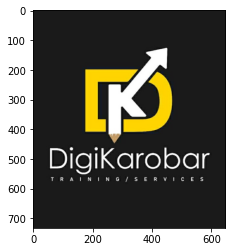

In [25]:
plt.imshow(im) # as RGB Format
plt.show()

In [26]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(473604, 3)


In [27]:
from sklearn.cluster import KMeans

In [28]:
dominant_colors = 4

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)


KMeans(n_clusters=4)

In [29]:
centers = km.cluster_centers_

In [30]:
centers = np.array(centers,dtype='uint8')

In [31]:
print(centers)

[[250 250 250]
 [ 25  25  25]
 [252 212   6]
 [142 134 110]]


### Plot what all colors are these ?

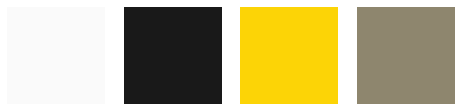

In [33]:
i = 1

plt.figure(0,figsize=(8,2))


colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()


## Segmenting Our Original Image

In [44]:
new_img = np.zeros((732*647,3),dtype='uint8')

print(new_img.shape)


(473604, 3)


In [45]:
colors

[array([250, 250, 250], dtype=uint8),
 array([25, 25, 25], dtype=uint8),
 array([252, 212,   6], dtype=uint8),
 array([142, 134, 110], dtype=uint8)]

In [46]:
km.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

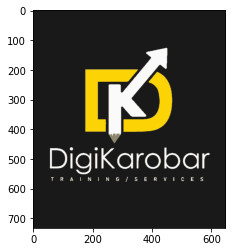

In [47]:

for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()
    
    
